In [46]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns

In [ ]:
file = 'diabetes-dataset.csv'
df = pd.read_csv(file)

In [48]:
# Tampilkan DataFrame sebelum menghapus duplikat
print("DataFrame sebelum menghapus duplikat:")
print(df)

print("DataFrame setelah menghapus duplikat:")

# Hapus data duplikat berdasarkan seluruh kolom
hapus = df.drop_duplicates(inplace=True)
print(df)
# Tampilkan DataFrame setelah menghapus duplikat


DataFrame sebelum menghapus duplikat:
        diabetes  kelamin  umur   bmi  tekananDarah  kolesterol  stroke  \
0            0.0      0.0   8.0  40.0           1.0         1.0     0.0   
1            0.0      0.0   6.0  25.0           0.0         0.0     0.0   
2            0.0      0.0   8.0  28.0           1.0         1.0     0.0   
3            0.0      0.0  10.0  27.0           1.0         0.0     0.0   
4            0.0      0.0  10.0  24.0           1.0         1.0     0.0   
...          ...      ...   ...   ...           ...         ...     ...   
253675       0.0      1.0   4.0  45.0           1.0         1.0     0.0   
253676       1.0      0.0  10.0  18.0           1.0         1.0     0.0   
253677       0.0      0.0   1.0  28.0           0.0         0.0     0.0   
253678       0.0      1.0   6.0  23.0           1.0         0.0     0.0   
253679       1.0      0.0   8.0  25.0           1.0         1.0     0.0   

        sakitJantung  rokok  alkohol  olahraga  buah  sayur  

In [54]:
df = df.reindex(columns=['Diabetes_binary', 'Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'Fruits', 'Veggies', 'DiffWalk'])

names = {'Diabetes_binary':'diabetes', 'Sex':'kelamin', 'Age':'umur', 'BMI':'bmi', 'HighBP':'tekananDarah', 'HighChol':'kolesterol', 'Stroke':'stroke', 'HeartDiseaseorAttack':'sakitJantung', 'Smoker':'rokok', 'HvyAlcoholConsump':'alkohol', 'PhysActivity':'olahraga', 'Fruits':'buah', 'Veggies':'sayur', 'DiffWalk':'susahJalan'}
df = df.rename(columns=names)
     

cols = df.columns

for names in cols:
  print(names)
  unique_values = df[names].unique()
  print(unique_values)

diabetes
[nan]
kelamin
[nan]
umur
[nan]
bmi
[nan]
tekananDarah
[nan]
kolesterol
[nan]
stroke
[nan]
sakitJantung
[nan]
rokok
[nan]
alkohol
[nan]
olahraga
[nan]
buah
[nan]
sayur
[nan]
susahJalan
[nan]


In [55]:

# replace umur start from 0
df['umur'] = df['umur'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0],
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]).astype(float)
     

In [56]:

# (TARGET)
# diabetes
# [0. 1.] = Tidak, Ya

# (FEATURES)
# kelamin
# [0. 1.] = Perempuan, Lakilaki
# umur
# [0. sampai 12.] = '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59','60-64', '65-69', '70-74', '75-79', '80 or older'
# bmi
# [float]
# tekananDarah
# [0. 1.] = Normal, Tinggi
# kolesterol
# [0. 1.] = Normal, Tinggi
# stroke
# [0. 1.] = Tidak, Ya
# sakitJantung
# [0. 1.] = Tidak , Ya
# rokok
# [0. 1.] = Tidak, Ya
# alkohol
# [0. 1.] = Tidak, Ya
# olahraga
# [0. 1.] = Tidak, Ya
# buah
# [0. 1.] = Tidak, Ya
# sayur
# [0. 1.] = Tidak, Ya
# susahJalan
# [0. 1.] = Tidak, Ya

In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop('diabetes', axis=1)
y = df['diabetes']
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
print("Distribusi kelas sebelum SMOTE:", Counter(y))
print("Distribusi kelas setelah SMOTE:", Counter(y_res))

In [11]:
input_shape = (X_train.shape[1],)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, input_shape=input_shape, activation='relu'),
  tf.keras.layers.Dropout(rate=0.1),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.05),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


7776/7776 [==============================] - 32s 4ms/step - loss: 0.5965 - accuracy: 0.6800 - val_loss: 0.5621 - val_accuracy: 0.7152
Epoch 2/100
7776/7776 [==============================] - 33s 4ms/step - loss: 0.5630 - accuracy: 0.7116 - val_loss: 0.5534 - val_accuracy: 0.7194
Epoch 3/100
7776/7776 [==============================] - 33s 4ms/step - loss: 0.5558 - accuracy: 0.7173 - val_loss: 0.5497 - val_accuracy: 0.7228
Epoch 4/100
7776/7776 [==============================] - 33s 4ms/step - loss: 0.5523 - accuracy: 0.7199 - val_loss: 0.5519 - val_accuracy: 0.7213
Epoch 5/100
7776/7776 [==============================] - 33s 4ms/step - loss: 0.5492 - accuracy: 0.7221 - val_loss: 0.5461 - val_accuracy: 0.7241
Epoch 6/100
7776/7776 [==============================] - 50s 6ms/step - loss: 0.5473 - accuracy: 0.7237 - val_loss: 0.5471 - val_accuracy: 0.7219
Epoch 7/100
7776/7776 [==============================] - 39s 5ms/step - loss: 0.5454 - accuracy: 0.7251 - val_loss: 0.543

In [12]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


2430/2430 [==============================] - 7s 3ms/step - loss: 0.4409 - accuracy: 0.7828
Test Loss: 0.4409387707710266, Test Accuracy: 0.7827938199043274


In [13]:
from sklearn.metrics import confusion_matrix, recall_score

# Prediksi label pada data uji
y_pre = model.predict(X_test)
y_pred = (y_pre > 0.5).astype(int)

print(y_pred)

2430/2430 [==============================] - 8s 2ms/step
[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


C:\Users\faisal\AppData\Local\Temp\ipykernel_19064\2532579825.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels([' No Diabetes', 'Diabetes Disease'])


[Text(0, 0, ' No Diabetes'), Text(1, 0, 'Diabetes Disease')]

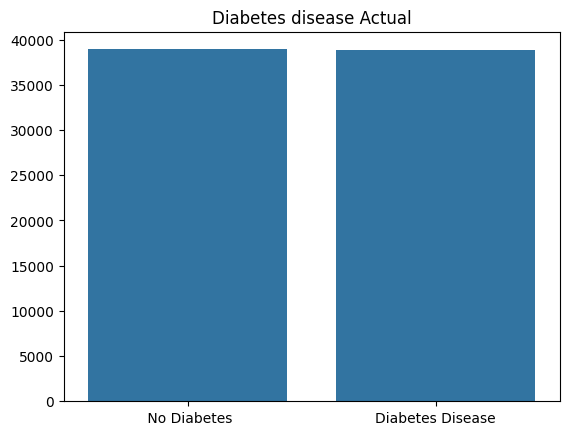

In [14]:
unique, counts = np.unique(y_test, return_counts=True)
f = sns.barplot(x=unique, y=counts)
f.set_title("Actual Diabetes")
f.set_title("Diabetes disease Actual")
f.set_xticklabels([' No Diabetes', 'Diabetes Disease'])


C:\Users\faisal\AppData\Local\Temp\ipykernel_19064\97193249.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(['No Diabetes disease', 'Diabetes Disease'])


[Text(0, 0, 'No Diabetes disease'), Text(1, 0, 'Diabetes Disease')]

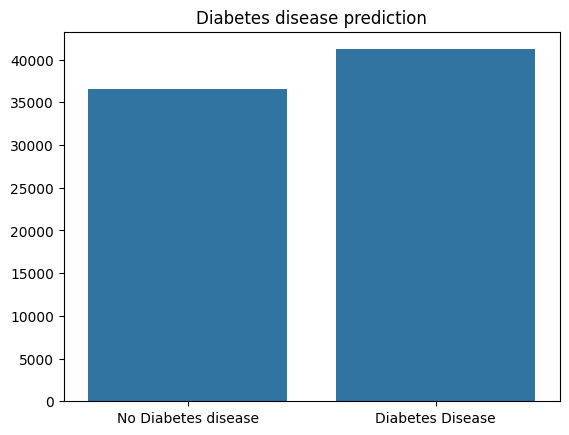

In [57]:
unique, counts = np.unique(y_pred, return_counts=True)
f = sns.barplot(x=unique, y=counts)
f.set_title("Predicted distribution")
f.set_title("Diabetes disease prediction")
f.set_xticklabels(['No Diabetes disease', 'Diabetes Disease'])


In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)

Confusion Matrix:
[[29297  9633]
 [ 7255 31566]]

Recall Score: 0.8131166121429123


In [59]:
data_list = [[1.0, 2.0, 26.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]]


data_array = np.array(data_list)

baru = model.predict(data_array)
print(baru)

1/1 [==============================] - 0s 30ms/step
[[0.44042888]]


In [71]:
import os
from tensorflow.python.saved_model.save import save

save_dir = os.path.join('tmp', 'baru/diabetes_model.h5')
model.save("model.h5")


In [61]:
cd 

C:\Users\faisal


In [62]:
cd tmp/diabetes


C:\Users\faisal\tmp\diabetes


In [36]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6E14-AA70

 Directory of C:\Users\faisal\tmp\diabetes

20/12/2023  21.30    <DIR>          .
20/12/2023  21.26    <DIR>          ..
20/12/2023  21.28           362.112 saved_model.h5
20/12/2023  21.30    <DIR>          tmp
               1 File(s)        362.112 bytes
               3 Dir(s)  65.568.653.312 bytes free


In [ ]:
tf.saved_model.save(model, path_to_dir)